<a href="https://colab.research.google.com/github/SaiPallavi7989/Movies-EDA-using-R/blob/main/Movies_EDA_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Movies Dataset in R**

# **Dataset Description:**

The movie dataset contains the following columns:

**1.MOVIES:** The title of the movie or TV show.

**2.YEAR:** The release year or duration of a TV series.

**3.GENRE:** The genre of the movie.

**4.RATING:** The average rating of the movie.

**5.ONE-LINE:** A brief description or tagline of the movie.

**6.STARS:** The cast and directors involved in the movie.

**7.VOTES:** The number of user ratings the movie has received.

**8.RUN-TIME:** The runtime of the movie in minutes.

**9.GROSS:** The box office gross earnings..

# **Installation:**

In [ ]:
#Install necessary Packages
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("stringr")

# Load necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **Distribution of movie genres using a Bar Plot**

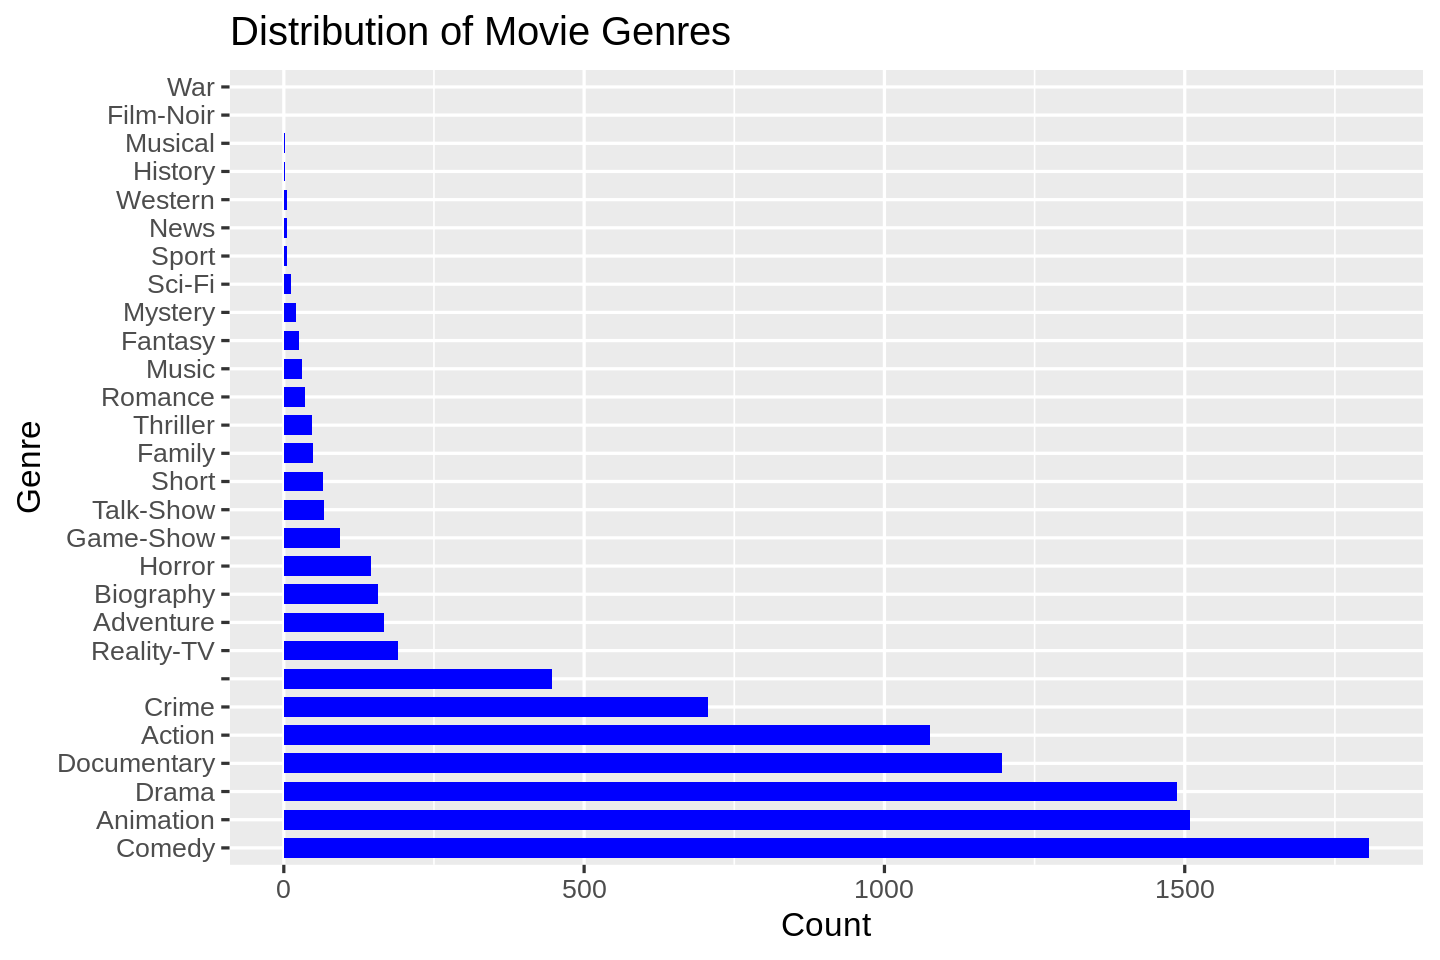

In [52]:
# Load the dataset
movies <- read.csv("movies (1).csv")

# Ensure there are no leading/trailing spaces in the GENRE column
movies$GENRE <- trimws(movies$GENRE)

# Replace the genre column with only the primary genre (first genre)
movies <- movies %>%
  mutate(Primary_Genre = sapply(str_split(GENRE, ","), function(x) trimws(x[1])))

# Replace the GENRE column entirely with the primary genre
movies$GENRE <- movies$Primary_Genre

# Count the occurrences of each genre
genre_counts <- movies %>%
  count(GENRE) %>%
  arrange(desc(n))

# Plot the genre distribution
ggplot(genre_counts, aes(x = reorder(GENRE, -n), y = n)) +
  geom_bar(stat = "identity", fill = "blue", width = 0.7) +  # Adjust bar width for clarity
  labs(x = "Genre", y = "Count", title = "Distribution of Movie Genres") +
  theme(plot.title = element_text(size = 18, face = "bold", color = "black", hjust = 0.5)) +
  theme_gray(base_size = 20) +
  coord_flip()



# **Distribution of movie durations using a Histogram**

Warning message:
“Removed 2371 rows containing non-finite outside the scale range (`stat_bin()`).”


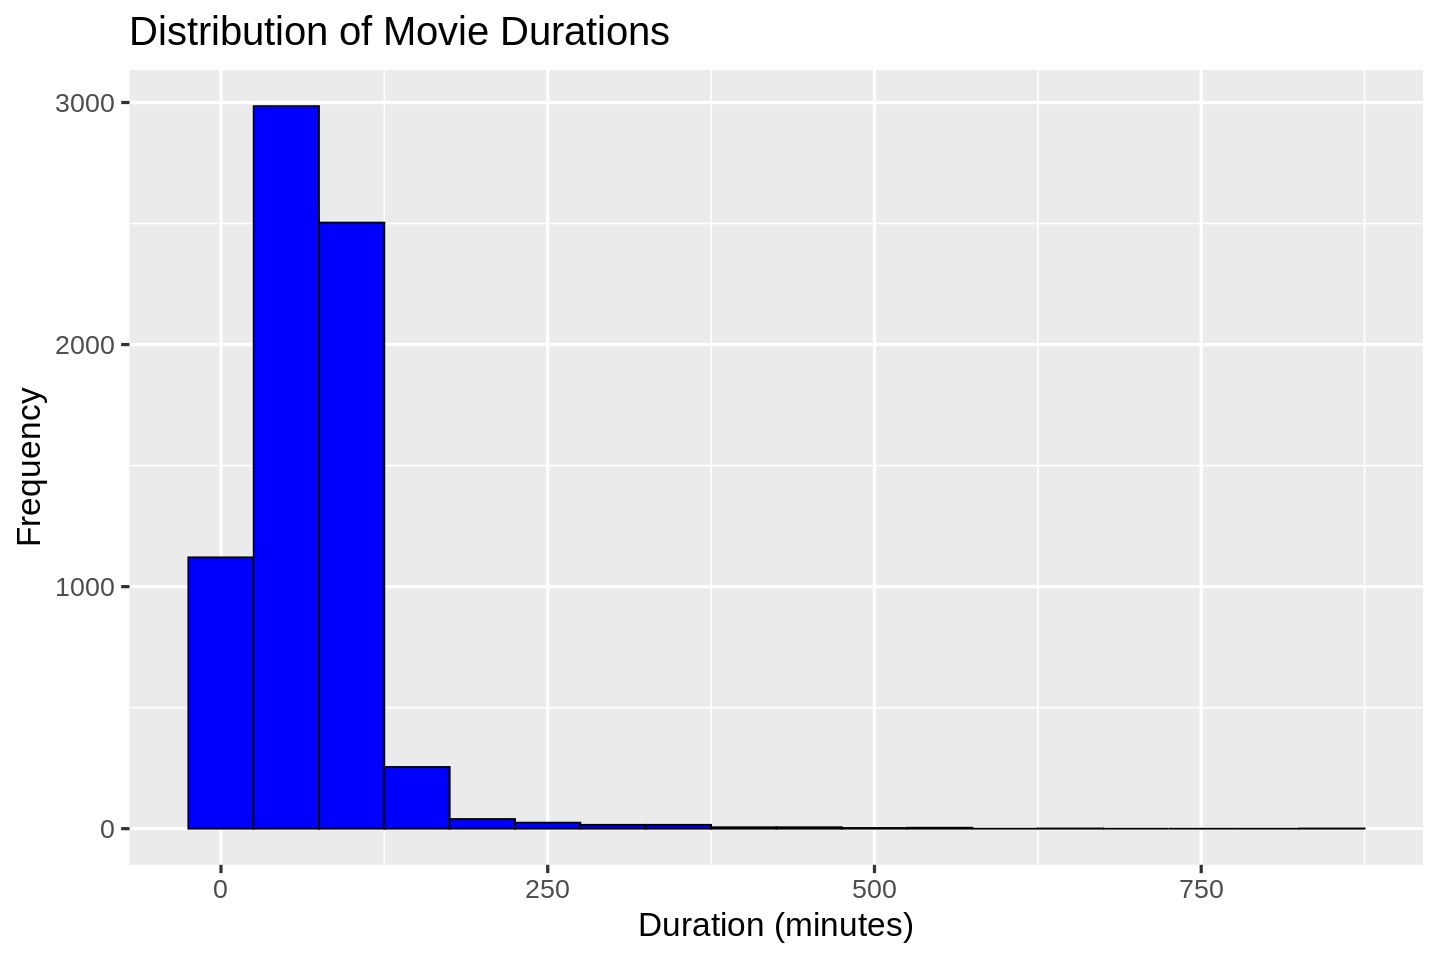

In [75]:
# Plot the distribution of movie durations
ggplot(movies, aes(x = RunTime)) +
  geom_histogram(binwidth = 50, fill = "blue", color = "black") +
  labs(title = "Distribution of Movie Durations", x = "Duration (minutes)", y = "Frequency") +
  theme(plot.title = element_text(size = 18, face = "bold", color = "black", hjust = 0.5)) +
  theme_gray(base_size = 20)


# **Average ratings of movies produced in different decades using a box plot**

Warning message:
“Removed 1190 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


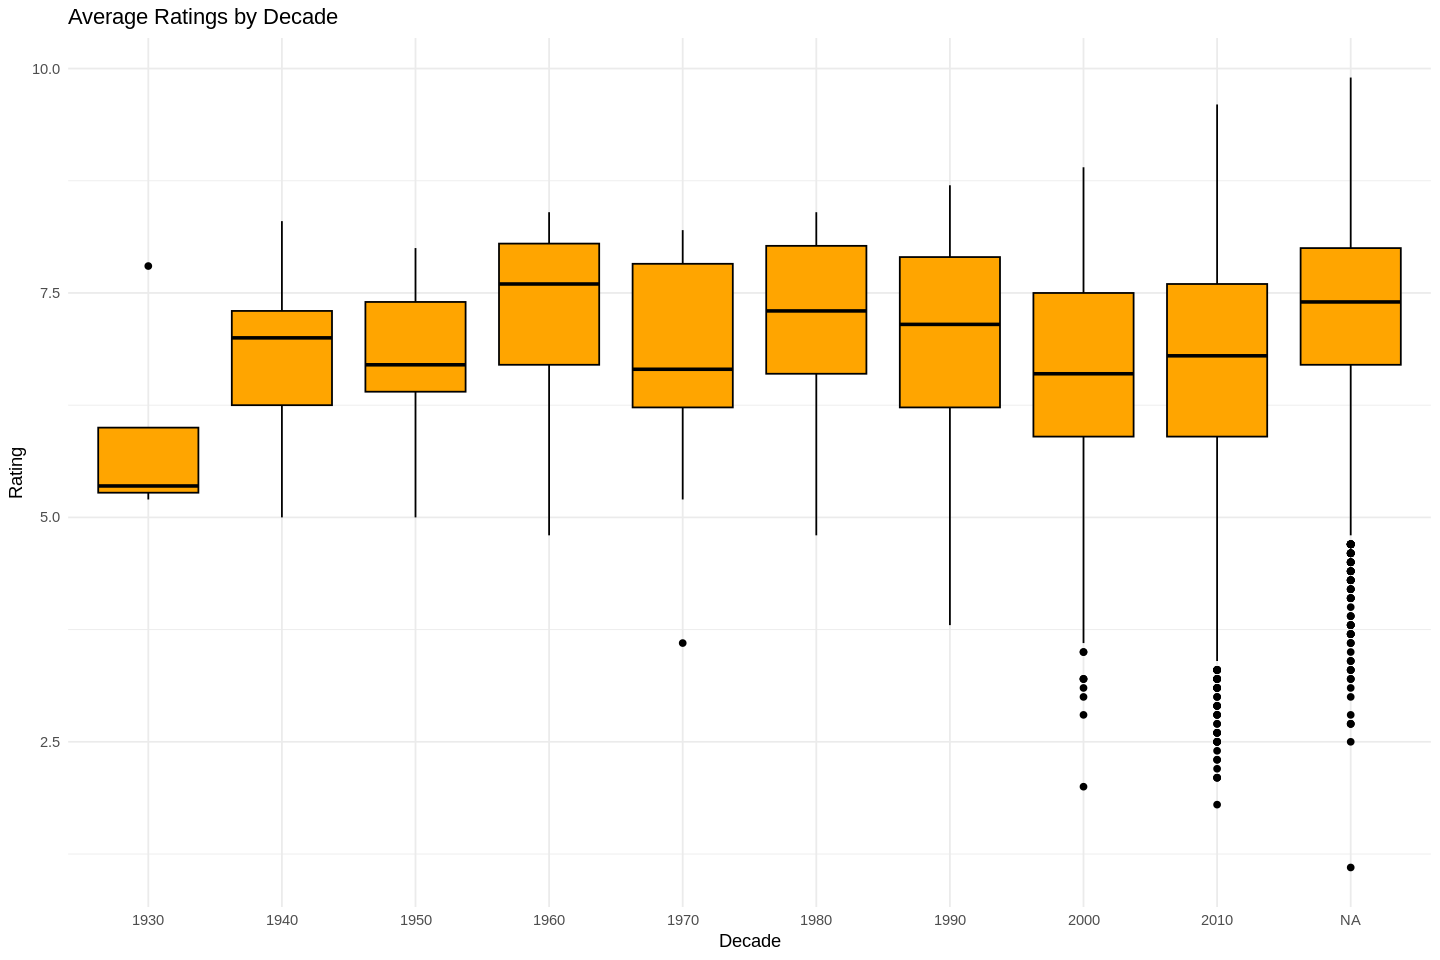

In [91]:
# Convert 'YEAR' column to numeric if it's not already
movies$YEAR <- as.numeric(as.character(movies$YEAR))

# Create a new column to categorize by decade
movies$Decade <- cut(movies$YEAR, breaks = seq(1900, 2020, by = 10), right = FALSE, labels = seq(1900, 2010, by = 10))

# Box plot of ratings by decade
ggplot(movies, aes(x = Decade, y = RATING)) +
  geom_boxplot(fill = "orange", color = "black") +
  labs(title = "Average Ratings by Decade", x = "Decade", y = "Rating") +
  theme(plot.title = element_text(size = 18, face = "bold", color = "black", hjust = 0.5))+
  theme_minimal()


# **Comparing Average Ratings between two Contrastive Movie Genres**

Warning message:
“Removed 189 rows containing non-finite outside the scale range
(`stat_summary()`).”


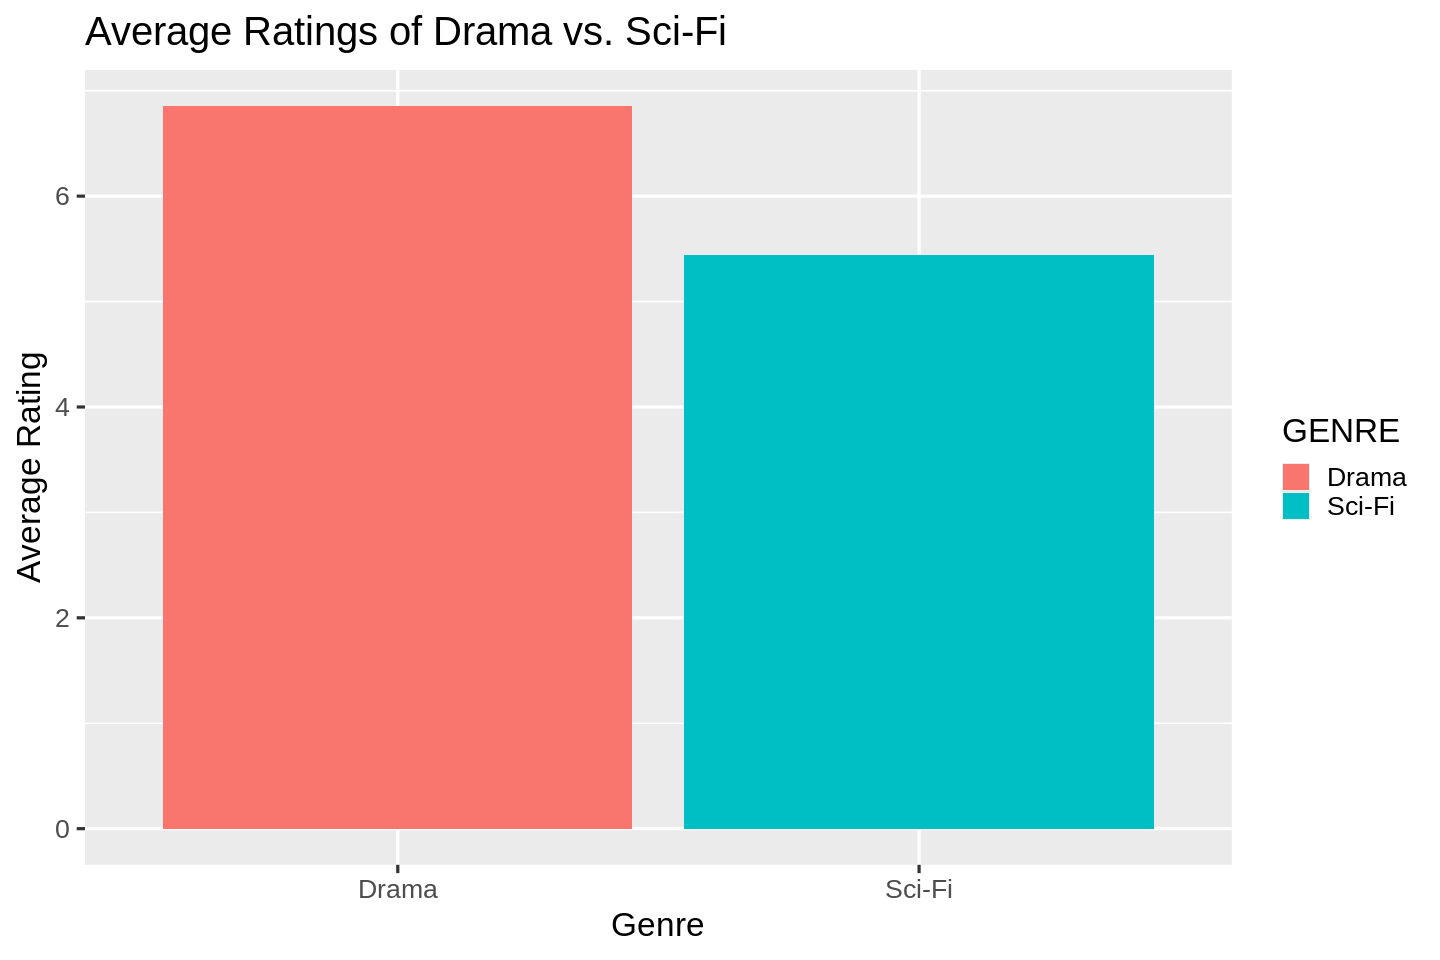

In [90]:
# Filter for two genres (Action and Romance)
selected_genres <- movies %>%
  filter(GENRE %in% c("Drama", "Sci-Fi"))

# Bar plot comparing the average ratings
ggplot(selected_genres, aes(x = GENRE, y = RATING, fill = GENRE)) +
  stat_summary(fun = mean, geom = "bar") +
  labs(title = "Average Ratings of Drama vs. Sci-Fi", x = "Genre", y = "Average Rating")


# **Distribution of movie durations within each genre using overlaid histograms**

Warning message:
“Removed 365 rows containing non-finite outside the scale range (`stat_bin()`).”


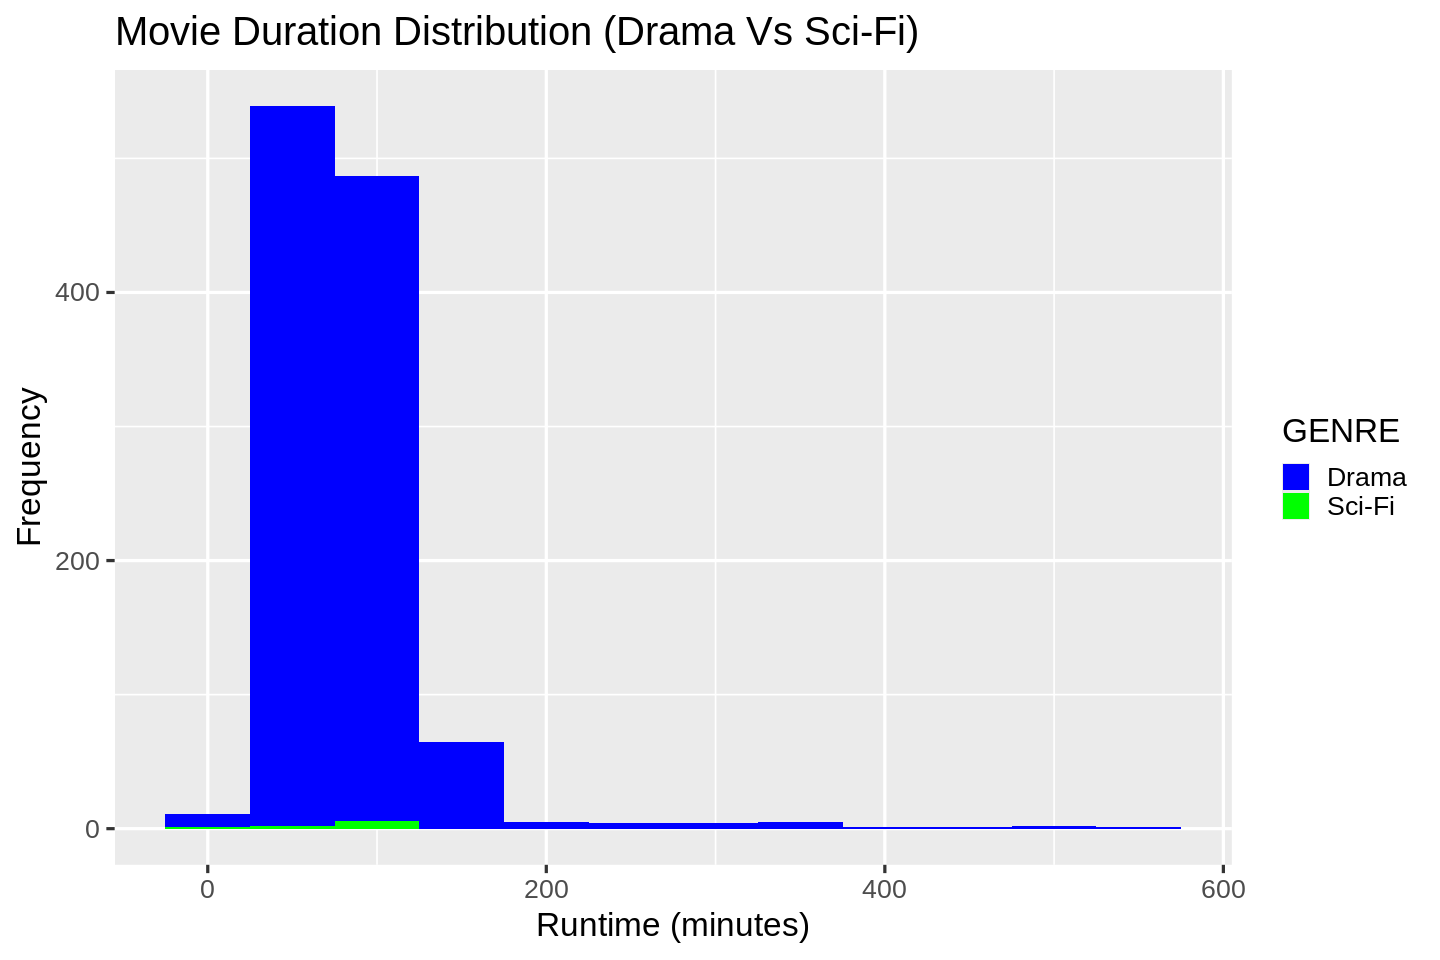

In [92]:
# Plot histograms for Action and Romance genres
ggplot(selected_genres, aes(x = RunTime, fill = GENRE)) +
  geom_histogram(position = "identity", binwidth = 50) +
  labs(title = "Movie Duration Distribution (Drama Vs Sci-Fi)", x = "Runtime (minutes)", y = "Frequency") +
  scale_fill_manual(values = c("Drama" = "blue", "Sci-Fi" = "green"))


# **Frequency of movie releases over the years for each genre using line plots.**

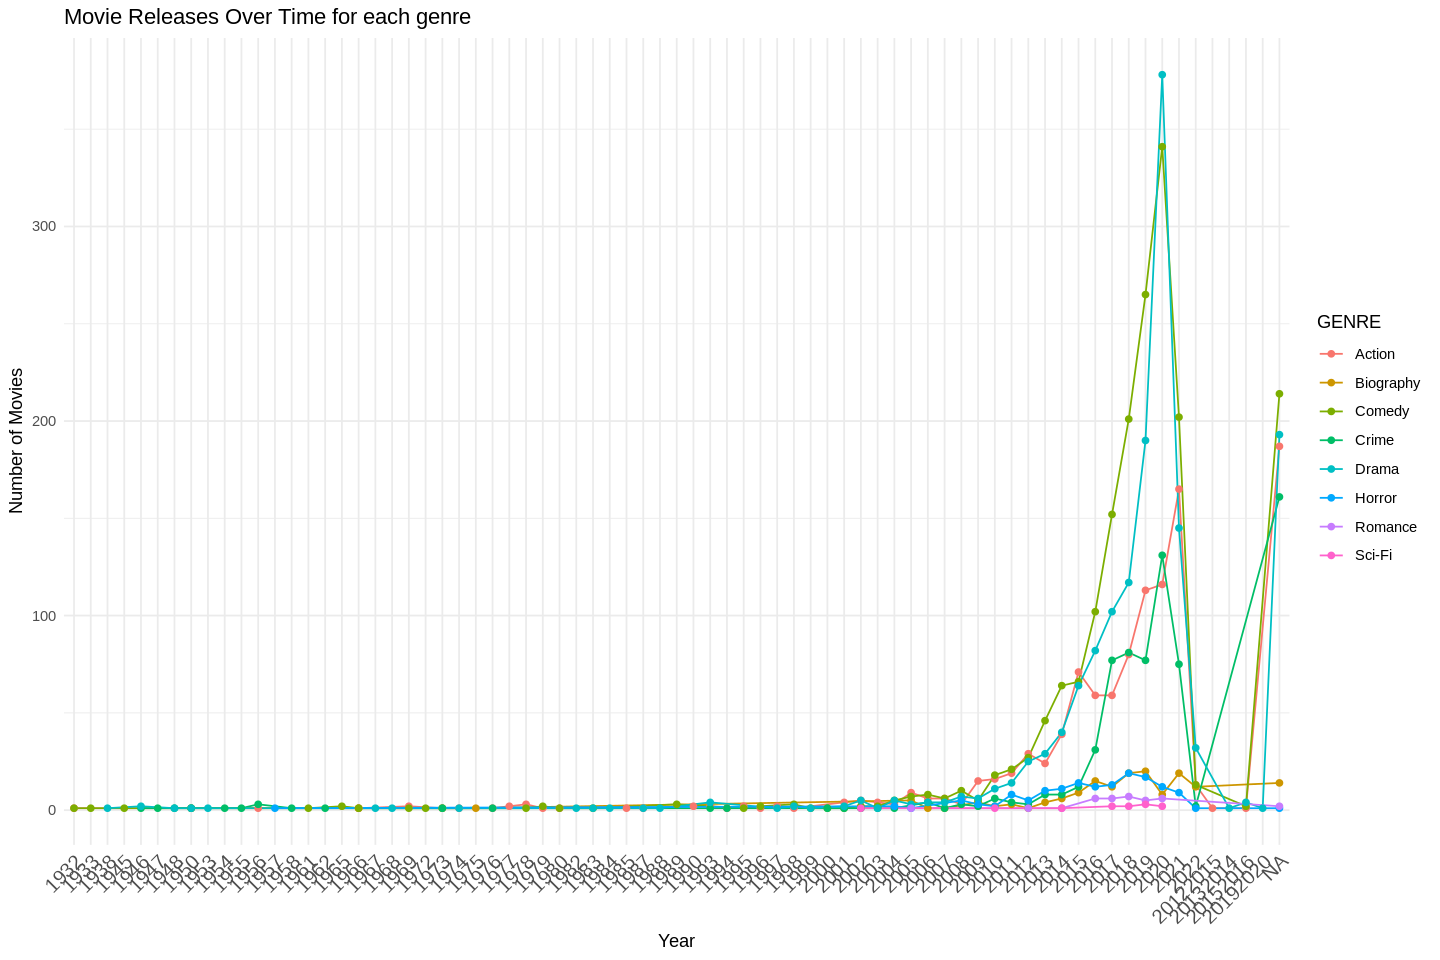

In [105]:
release_trends <- movies %>%
  group_by(YEAR, GENRE) %>%
  summarize(count = n(), .groups = 'drop')  # Use .groups = 'drop' to avoid grouping warnings

# Ensure YEAR is treated as a factor for proper x-axis formatting
release_trends$YEAR <- as.factor(release_trends$YEAR)

# Plot the frequency of movie releases over the years for Action and Romance
ggplot(release_trends %>% filter(GENRE %in% c("Action", "Romance","Drama","Sci-Fi","Comedy","Crime","Biography","Horror")),
       aes(x = YEAR, y = count, color = GENRE, group = GENRE)) +
  geom_line() +
  geom_point() +  # Add points for better visibility
  labs(title = "Movie Releases Over Time for each genre",
       x = "Year",
       y = "Number of Movies") +
  theme_minimal() +  # Use a minimal theme
  scale_x_discrete(breaks = unique(release_trends$YEAR)) +  # Ensure all years are displayed
  theme(axis.text.x = element_text(size = 12, angle = 45, hjust = 1))  # Increase x-axis label size and rotate for better visibility

# **Conclusion:**

The exploratory data analysis (EDA) conducted on the movie dataset reveals several key insights:

**1. Popular Genres:** Certain genres, like action and comedy, are more popular among viewers, which can guide future film projects.

**2. Ratings:** Movies with higher ratings tend to earn more at the box office, highlighting the importance of quality storytelling.

**3. Audience Insights:** Understanding who watches what helps filmmakers tailor their content to meet audience preferences.

Overall, these insights can help filmmakers and marketers make better decisions in creating and promoting films that resonate with audiences.